# How can we accurately predict food delivery times in Python—using features such as delivery-person age, ratings, and distance—to improve customer satisfaction and logistical planning?

In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv(r"C:\Users\tajud\OneDrive\Desktop\NRIT\sudents and projects\S6\Reression\Delivery-time\Delivery time\deliverytime.csv")

In [5]:
data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30


In [7]:
data.isna().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Type_of_order                  0
Type_of_vehicle                0
Time_taken(min)                0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  int64  
 3   Delivery_person_Ratings      45593 non-null  float64
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Type_of_order                45593 non-null  object 
 9   Type_of_vehicle              45593 non-null  object 
 10  Time_taken(min)              45593 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 3.8+ MB


In [11]:
data=data.drop(columns=['ID','Delivery_person_ID'],axis=1)

In [13]:
data

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30
...,...,...,...,...,...,...,...,...,...
45588,30,4.8,26.902328,75.794257,26.912328,75.804257,Meal,motorcycle,32
45589,21,4.6,0.000000,0.000000,0.070000,0.070000,Buffet,motorcycle,36
45590,30,4.9,13.022394,80.242439,13.052394,80.272439,Drinks,scooter,16
45591,20,4.7,11.001753,76.986241,11.041753,77.026241,Snack,motorcycle,26


In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Type_of_order'] = le.fit_transform(data['Type_of_order'])
data['Type_of_vehicle'] = le.fit_transform(data['Type_of_vehicle'])

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          45593 non-null  int64  
 1   Delivery_person_Ratings      45593 non-null  float64
 2   Restaurant_latitude          45593 non-null  float64
 3   Restaurant_longitude         45593 non-null  float64
 4   Delivery_location_latitude   45593 non-null  float64
 5   Delivery_location_longitude  45593 non-null  float64
 6   Type_of_order                45593 non-null  int32  
 7   Type_of_vehicle              45593 non-null  int32  
 8   Time_taken(min)              45593 non-null  int64  
dtypes: float64(5), int32(2), int64(2)
memory usage: 2.8 MB


In [27]:
X = data.drop("Time_taken(min)", axis=1)
y = data["Time_taken(min)"]

In [29]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [33]:
# MULTILINEAR REGRESSION

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import numpy as np


lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

MAE = mean_absolute_error(y_test, y_pred_lr)
MSE = mean_squared_error(y_test, y_pred_lr)
RMSE = np.sqrt(MSE)

print("🔹 Multiple Linear Regression")
print("MAE:", MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)

r2 = r2_score(y_test, y_pred_lr)
print("🔹 R² Score (Accuracy for Regression):", r2)



🔹 Multiple Linear Regression
MAE: 6.636405483731466
MSE: 71.63221754013398
RMSE: 8.463581838685911
🔹 R² Score (Accuracy for Regression): 0.1830093542965805


In [37]:
# POLYNOMIAL REGRESSION

In [39]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

MAE = mean_absolute_error(y_test, y_pred_poly)
MSE = mean_squared_error(y_test, y_pred_poly)
RMSE = np.sqrt(MSE)

print("\n🔸 Polynomial Regression (Degree=2)")
print("MAE:", MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)



🔸 Polynomial Regression (Degree=2)
MAE: 6.286239548101829
MSE: 62.58236486815427
RMSE: 7.9109016469776865


In [41]:
# SVR

In [43]:
from sklearn.svm import SVR

svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

MAE = mean_absolute_error(y_test, y_pred_svr)
MSE = mean_squared_error(y_test, y_pred_svr)
RMSE = np.sqrt(MSE)

print("\n🔹 Support Vector Regression")
print("MAE:", MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)

r2 = r2_score(y_test, y_pred_svr)
print("🔹 R² Score (Accuracy for Regression):", r2)



🔹 Support Vector Regression
MAE: 6.285267129497542
MSE: 66.49206014379192
RMSE: 8.15426637679883
🔹 R² Score (Accuracy for Regression): 0.2416346580281289


In [44]:
# RANDOM FOREST REGRESSOR

In [45]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

MAE = mean_absolute_error(y_test, y_pred_rf)
MSE = mean_squared_error(y_test, y_pred_rf)
RMSE = np.sqrt(MSE)

print("\n🔸 Random Forest Regression")
print("MAE:", MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred_rf)
print("🔹 R² Score (Accuracy for Regression):", r2)


🔸 Random Forest Regression
MAE: 6.161811596057072
MSE: 62.23186558752908
RMSE: 7.8887176136257455
🔹 R² Score (Accuracy for Regression): 0.29022367594305387


In [49]:
# XGB REGRESSOR

In [51]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

MAE = mean_absolute_error(y_test, y_pred_xgb)
MSE = mean_squared_error(y_test, y_pred_xgb)
RMSE = np.sqrt(MSE)

print("\n🔹 XGBoost Regression")
print("MAE:", MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)


🔹 XGBoost Regression
MAE: 5.830668079394209
MSE: 55.30193287998819
RMSE: 7.4365269366814095


In [53]:
import matplotlib.pyplot as plt

# Store error values for each model
model_names = ['Linear', 'Polynomial','SVR', 'Random Forest','XGBoost']

mae_values = [
    mean_absolute_error(y_test, y_pred_lr),      # Linear Regression
    mean_absolute_error(y_test, y_pred_poly),    # Polynomial Regression 
    mean_absolute_error(y_test, y_pred_svr),     # SVR
    mean_absolute_error(y_test, y_pred_rf),      # Random Forest
    mean_absolute_error(y_test, y_pred_xgb)      # XGBoost
]

mse_values = [
    mean_squared_error(y_test, y_pred_lr),
    mean_squared_error(y_test, y_pred_poly),
    mean_squared_error(y_test, y_pred_svr),
    mean_squared_error(y_test, y_pred_rf),
    mean_squared_error(y_test, y_pred_xgb)
]

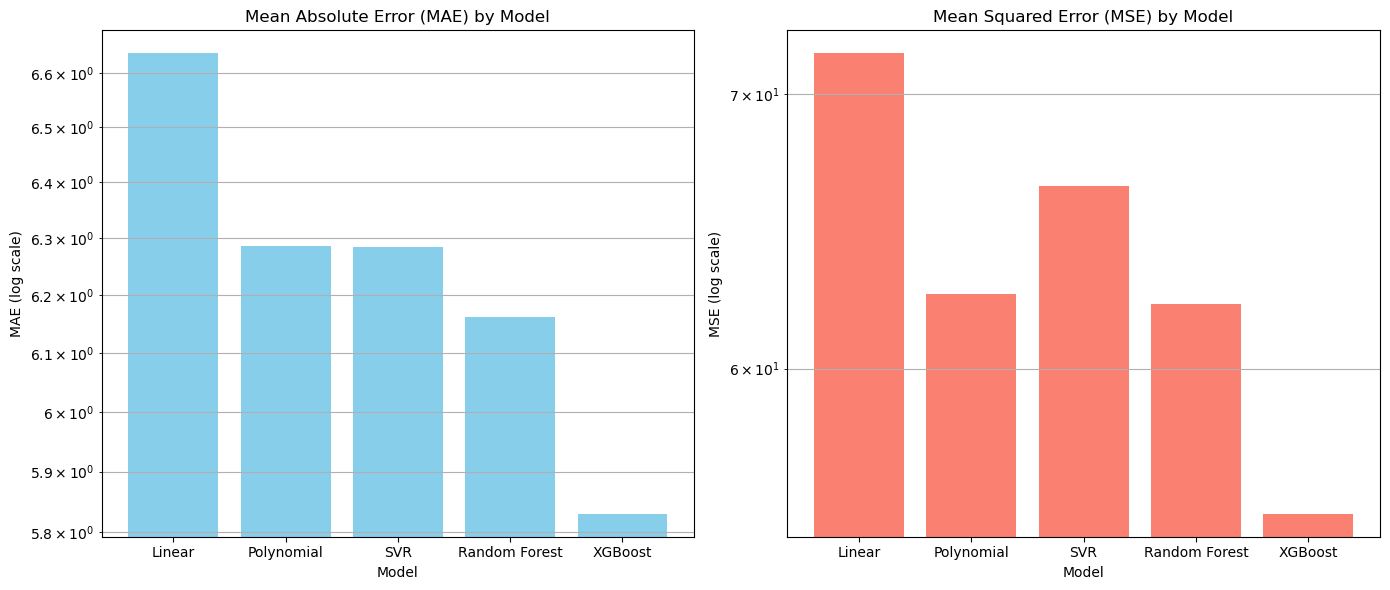

In [55]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# MAE Plot (log scale)
axs[0].bar(model_names, mae_values, color='skyblue')
axs[0].set_title("Mean Absolute Error (MAE) by Model")
axs[0].set_ylabel("MAE (log scale)")
axs[0].set_xlabel("Model")
axs[0].set_yscale('log')  # ✅ log scale
axs[0].grid(axis='y', which='both')

# MSE Plot (log scale)
axs[1].bar(model_names, mse_values, color='salmon')
axs[1].set_title("Mean Squared Error (MSE) by Model")
axs[1].set_ylabel("MSE (log scale)")
axs[1].set_xlabel("Model")
axs[1].set_yscale('log')  # ✅ log scale
axs[1].grid(axis='y', which='both')

plt.tight_layout()
plt.show()